In [1]:
# This is Eli's Python File
# Import statements
import numpy as np
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Read the affordability data
median_income_csv = Path("../Data/household_income_msa_2019.csv")
median_income_df = pd.read_csv(median_income_csv)
# Clean the affordability data
median_income_df = median_income_df.transpose() # Transpose the column/headers
new_header = median_income_df.iloc[0] #grab the first row for the header
median_income_df = median_income_df[1:] #take the data less the header row
median_income_df.columns = new_header #set the header row as the df header
median_income_df = median_income_df[['Median income (dollars)','Mean income (dollars)']] # Use only median and mean income data columns
median_income_df.reset_index(inplace=True)
median_income_df[['MSA','extra']] = median_income_df['index'].str.split(",", n = 1, expand=True) # Split MSA from text string
median_income_df[['State','extra2']] = median_income_df['extra'].str.split(n = 1, expand=True) # Split State from remaining text string
median_income_df[['Primary MSA','Secondary MSA']] = median_income_df['MSA'].str.split("-", n = 1, expand=True) # Split primary MSA from first text string
median_income_df[['Primary State','Secondary State']] = median_income_df['State'].str.split("-", n = 1, expand=True) # Split primary State from first text string
median_income_df.drop(columns=['index','extra','extra2','MSA','State'],inplace=True) # Drop unnecessary columns
median_income_df.drop_duplicates(subset=['Primary MSA','Primary State'], inplace=True) # Drop duplicates -- first instance is the median and mean income by MSA
median_income_df.head()

Label Median income (dollars) Mean income (dollars) Primary MSA Secondary MSA  \
0                      61,026                77,948    Aberdeen          None   
8                      54,808                71,517     Abilene          None   
16                     53,865                69,443      Adrian          None   
24                     16,311                25,781   Aguadilla       Isabela   
32                     57,158                80,800       Akron          None   

Label Primary State Secondary State  
0                WA            None  
8                TX            None  
16               MI            None  
24               PR            None  
32               OH            None

In [3]:
# read the uscities csv. this file will be used for the longitude and latitude, as well as the density stats.
longlatdensity_csv = Path("../Data/uscities.csv")
longlatdensity_df = pd.read_csv(longlatdensity_csv)
longlatdensity_df.head(5)

#getting first zipcode from list of zipcodes
longlatdensity_df[['firstzip']] = longlatdensity_df['zips'].str.split(",", n = 1, expand=True)
longlatdensity_df[['firstzip']] = longlatdensity_df['zips'].str[:5]

#dropping unnecessary columns
longlatdensity_df.drop(columns=['source','military','incorporated','timezone','city_ascii',"zips"],inplace=True)
longlatdensity_df.drop_duplicates()
longlatdensity_df

city state_id    state_name  county_fips  county_name      lat  \
0         New York       NY      New York        36061     New York  40.6943   
1      Los Angeles       CA    California         6037  Los Angeles  34.1139   
2          Chicago       IL      Illinois        17031         Cook  41.8373   
3            Miami       FL       Florida        12086   Miami-Dade  25.7839   
4           Dallas       TX         Texas        48113       Dallas  32.7936   
...            ...      ...           ...          ...          ...      ...   
29483       Caputa       SD  South Dakota        46103   Pennington  43.9960   
29484       Hamill       SD  South Dakota        46123        Tripp  43.5939   
29485       Loomis       SD  South Dakota        46035      Davison  43.7931   
29486  Bijou Hills       SD  South Dakota        46015        Brule  43.5285   
29487          Ola       SD  South Dakota        46015        Brule  43.6005   

            lng  population  density  ranking          id firstzip  
0      -73.9249  18713220.0  10715.0        1  1840034016    11229  
1     -118.4068  12750807.0   3276.0        1  1840020491    90291  
2      -87.6862   8604203.0   4574.0        1  1840000494    60018  
3      -80.2102   6445545.0   5019.0        1  1840015149    33129  
4      -96.7662   5743938.0   1526.0        1  1840019440    75287  
...         ...         ...      ...      ...         ...      ...  
29483 -102.9847         0.0      0.0        3  1840035951    57703  
29484  -99.6907         0.0      0.0        3  1840004186    57534  
29485  -98.1036         0.0      0.0        3  1840004170    57301  
29486  -99.1439         0.0      0.0        3  1840024011    57369  
29487  -99.2114         0.0      0.0        3  1840024012    57325  

[29488 rows x 12 columns]

In [4]:
# # Testing Monte Carlo Simulation
# # Read in test CSV
# test_csv = Path("../Data/sim_test_data.csv")
# test_df = pd.read_csv(test_csv)
# test_df.set_index('Date', inplace=True)
# test_df.columns = [test_df.columns,['Ticker'] * len(test_df.columns), ['close'] * len(test_df.columns)]
# test_df.head()

# MC_oneyear = MCSimulation(
#     portfolio_data = test_df['Test_MSA'],
#     weights = [1],
#     num_simulation = 10,
#     num_trading_days = 12*1
# )

# # Running a Monte Carlo simulation to forecast cumulative returns
# sim_df = MC_oneyear.calc_cumulative_return() - 1
# end_return = pd.DataFrame(index=['Average Cumulative Return'])
# end_return['Test_MSA'] = sim_df.iloc[-1,:].mean()


In [5]:
# Read in test CSV
file_name='house_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")

# Clean data
house_price_df= pd.read_csv(csv_file)
region_id_df=house_price_df #(set_index='RegionID')
region_id_df.set_index(region_id_df['RegionName'],inplace=True)
region_id_df=region_id_df.drop(columns=['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])
region_id_df=region_id_df.transpose()
region_id_df.columns.name = None
region_id_df.columns = [region_id_df.columns,['Ticker'] * len(region_id_df.columns), ['close'] * len(region_id_df.columns)]
region_id_df.head()

United States New York, NY Los Angeles-Long Beach-Anaheim, CA  \
                 Ticker       Ticker                             Ticker   
                  close        close                              close   
1/31/1996      107630.0     187842.0                           183929.0   
2/29/1996      107657.0     187403.0                           184185.0   
3/31/1996      107707.0     187125.0                           184205.0   
4/30/1996      107834.0     186592.0                           184312.0   
5/31/1996      107977.0     186274.0                           184286.0   

          Chicago, IL Dallas-Fort Worth, TX Philadelphia, PA Houston, TX  \
               Ticker                Ticker           Ticker      Ticker   
                close                 close            close       close   
1/31/1996    164647.0              114406.0         121233.0    110773.0   
2/29/1996    164345.0              114471.0         121078.0    110849.0   
3/31/1996    163946.0              114634.0         120937.0    110858.0   
4/30/1996    163493.0              114962.0         120693.0    111007.0   
5/31/1996    162886.0              115314.0         120527.0    111148.0   

          Washington, DC Miami-Fort Lauderdale, FL Atlanta, GA  ...  \
                  Ticker                    Ticker      Ticker  ...   
                   close                     close       close  ...   
1/31/1996       178034.0                  109403.0    120291.0  ...   
2/29/1996       177811.0                  109533.0    120519.0  ...   
3/31/1996       177681.0                  109670.0    120740.0  ...   
4/30/1996       177407.0                  109917.0    121229.0  ...   
5/31/1996       177288.0                  110132.0    121711.0  ...   

          Winnemucca, NV Sweetwater, TX Andrews, TX Zapata, TX Vermillion, SD  \
                  Ticker         Ticker      Ticker     Ticker         Ticker   
                   close          close       close      close          close   
1/31/1996            NaN            NaN         NaN        NaN            NaN   
2/29/1996            NaN            NaN         NaN        NaN            NaN   
3/31/1996            NaN            NaN         NaN        NaN            NaN   
4/30/1996            NaN            NaN         NaN        NaN            NaN   
5/31/1996            NaN            NaN         NaN        NaN            NaN   

          Lamesa, TX Craig, CO Pecos, TX Vernon, TX Ketchikan, AK  
              Ticker    Ticker    Ticker     Ticker        Ticker  
               close     close     close      close         close  
1/31/1996        NaN   60501.0       NaN        NaN           NaN  
2/29/1996        NaN   60725.0       NaN        NaN           NaN  
3/31/1996        NaN   60961.0       NaN        NaN           NaN  
4/30/1996        NaN   61420.0       NaN        NaN           NaN  
5/31/1996        NaN   61747.0       NaN        NaN           NaN  

[5 rows x 914 columns]

In [6]:
# Configuring a Monte Carlo simulation to forecast housing market returns
returns = pd.DataFrame(index=['1 Year Avg Return', '3 Year Avg Return', '5 Year Avg Return'])
for msa in region_id_df.columns.get_level_values(0):

    MC = MCSimulation(
        portfolio_data = region_id_df[msa],
        weights = [1],
        num_simulation = 1000,
        num_trading_days = 12*5
    )

    # Running a Monte Carlo simulation to forecast cumulative returns
    sim_df = MC.calc_cumulative_return() - 1
    returns.loc['5 Year Avg Return',msa] = ((1 + sim_df.iloc[-1,:].mean()) ** (1/5)) - 1 
    returns.loc['3 Year Avg Return',msa] = ((1 + sim_df.iloc[35,:].mean()) ** (1/3)) - 1
    returns.loc['1 Year Avg Return',msa] = ((1 + sim_df.iloc[11,:].mean()) ** (1/1)) - 1

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [7]:
# Sort values and reformat table
house_price_forecast = returns.sort_values(by='5 Year Avg Return', axis=1,ascending=False)
house_price_forecast = house_price_forecast.transpose()
house_price_forecast

1 Year Avg Return  3 Year Avg Return  5 Year Avg Return
Pecos, TX                     0.103146           0.109415           0.112757
Grenada, MS                   0.090470           0.096465           0.099253
Winnemucca, NV                0.081175           0.084790           0.087813
Williston, ND                 0.069122           0.073783           0.076365
Klamath Falls, OR             0.066702           0.071038           0.073223
...                                ...                ...                ...
Decatur, IL                  -0.002267          -0.002033          -0.001975
Espa±ola, NM                 -0.005790          -0.006864          -0.007012
Deming, NM                   -0.014923          -0.015256          -0.015737
Cambridge, MD                -0.017811          -0.018398          -0.018826
Sulphur Springs, TX          -0.019690          -0.019822          -0.020336

[914 rows x 3 columns]

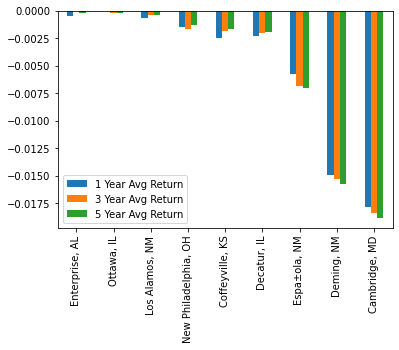

In [8]:
# Sample plot of data
plot_data = house_price_forecast.iloc[-10:-1,:]
plot_data.plot(kind='bar')

In [9]:
# Reformat table for joining with coordinates data
house_price_forecast.reset_index(inplace=True)
house_price_forecast[['city','state']] = house_price_forecast['index'].str.split(", ", n = 1, expand=True)
house_price_forecast.drop(columns=['index'],inplace=True)
house_price_forecast.set_index(['city','state'],inplace=True)
house_price_forecast

1 Year Avg Return  3 Year Avg Return  5 Year Avg Return
city            state                                                         
Pecos           TX              0.103146           0.109415           0.112757
Grenada         MS              0.090470           0.096465           0.099253
Winnemucca      NV              0.081175           0.084790           0.087813
Williston       ND              0.069122           0.073783           0.076365
Klamath Falls   OR              0.066702           0.071038           0.073223
...                                  ...                ...                ...
Decatur         IL             -0.002267          -0.002033          -0.001975
Espa±ola        NM             -0.005790          -0.006864          -0.007012
Deming          NM             -0.014923          -0.015256          -0.015737
Cambridge       MD             -0.017811          -0.018398          -0.018826
Sulphur Springs TX             -0.019690          -0.019822          -0.020336

[914 rows x 3 columns]

In [10]:
# Join coordinates data with forecasted prices for final dataframe
coordinates_df = longlatdensity_df.loc[:,['city','lat','lng','population','firstzip','state_id']] 
coordinates_df.drop_duplicates(subset=['city','state_id'],inplace=True)
coordinates_df.set_index(['city','state_id'],inplace=True)
combined_forecast_df = pd.concat([house_price_forecast,coordinates_df], axis='columns', join='inner')
combined_forecast_df.head()

1 Year Avg Return  3 Year Avg Return  5 Year Avg Return  \
Cullman        AL           0.029739           0.032062           0.033077   
Gallup         NM           0.003838           0.004258           0.004456   
Niles          MI           0.023460           0.025404           0.026323   
Dodge City     KS           0.018783           0.020161           0.020854   
Coffeyville    KS          -0.002473          -0.001819          -0.001617   
Bay City       MI           0.022276           0.023369           0.024231   
Statesboro     GA           0.022697           0.024114           0.024936   
Shawano        WI           0.013293           0.013936           0.014304   
Kapaa          HI           0.037190           0.039445           0.040632   
Heber          UT           0.041303           0.044115           0.045143   
Ardmore        OK           0.032805           0.034849           0.035915   
Santa Fe       NM           0.023873           0.025304           0.026050   
Killeen        TX           0.016478           0.017676           0.018095   
Dayton         TN           0.031747           0.033836           0.034578   
Kalamazoo      MI           0.025983           0.027176           0.027793   
State College  PA           0.033493           0.034645           0.035562   
Huntington     IN           0.012746           0.013362           0.013690   
Idaho Falls    ID           0.036689           0.039674           0.040757   
Jackson        OH           0.024719           0.026026           0.026713   
Point Pleasant WV           0.026023           0.028038           0.028832   
Gulfport       MS           0.006265           0.007346           0.007694   
Kingsville     TX           0.025197           0.026995           0.027861   
Ogden          UT           0.033349           0.036122           0.037114   
Starkville     MS           0.019852           0.020285           0.021093   
Bluefield      WV           0.021583           0.023228           0.023991   
Parsons        KS           0.018960           0.019705           0.020684   
Forest City    NC           0.022699           0.024343           0.025025   
Sikeston       MO           0.028530           0.030161           0.030988   
Wenatchee      WA           0.045418           0.048343           0.049905   
Cedar Rapids   IA           0.019769           0.020925           0.021470   
Augusta        ME           0.034585           0.036865           0.038008   
Brenham        TX           0.032058           0.033960           0.035047   
Chillicothe    OH           0.028152           0.029738           0.030585   
Jackson        MS           0.017555           0.018560           0.019196   
Mount Vernon   IL           0.015598           0.016849           0.017258   
Richmond       KY           0.029295           0.031112           0.031956   
Indianola      MS           0.023031           0.023995           0.024624   
Hood River     OR           0.047712           0.051013           0.052354   
North Platte   NE           0.028566           0.030438           0.031434   
Kalispell      MT           0.030462           0.032755           0.033591   
St. George     UT           0.034783           0.037169           0.037691   
Syracuse       NY           0.024885           0.025808           0.026512   
Lexington      NE           0.024202           0.025699           0.026466   
Jefferson      GA           0.036311           0.037968           0.039240   
Cornelia       GA           0.015688           0.016909           0.017420   
Ottawa         IL          -0.000002          -0.000228          -0.000223   
Bloomsburg     PA           0.029677           0.031473           0.032527   
Baton Rouge    LA           0.022563           0.023622           0.024195   
Longview       WA           0.047094           0.049659           0.050909   
Houston        TX           0.027371           0.029161           0.029789   

                       lat       lng  po

In [11]:
# Output montecarlo simulation end product
mc_output_csv = Path("../Data/mc_output.csv")
combined_forecast_df.to_csv(mc_output_csv)

In [68]:
# Read the montecarlo data csv
mc_output_csv = Path("../Data/mc_output.csv")
mc_output = pd.read_csv(mc_output_csv)
mc_output[['1 Year Avg Return','3 Year Avg Return','5 Year Avg Return']] = mc_output[['1 Year Avg Return','3 Year Avg Return','5 Year Avg Return']]*100

In [69]:
mc_output.head()

Unnamed: 0 Unnamed: 1  1 Year Avg Return  3 Year Avg Return  \
0      Cullman         AL           2.973927           3.206215   
1       Gallup         NM           0.383775           0.425795   
2        Niles         MI           2.345951           2.540427   
3   Dodge City         KS           1.878296           2.016130   
4  Coffeyville         KS          -0.247255          -0.181866   

   5 Year Avg Return      lat       lng  population  firstzip  
0           3.307670  34.1777  -86.8407     19920.0     35058  
1           0.445561  35.5183 -108.7423     22917.0     87301  
2           2.632331  41.8346  -86.2473     11149.0     49120  
3           2.085382  37.7610 -100.0183     27080.0     67801  
4          -0.161729  37.0518  -95.6180      9827.0     67337

In [78]:
# Formatting final data table for monte carlo statistical summary
higher_pop_output = mc_output.loc[mc_output['population'] > 50000]
mc_analysis = higher_pop_output.describe()
mc_analysis.drop(columns=['lat','lng','firstzip'],inplace=True)
mc_analysis.style.format({"1 Year Avg Return": "{:.2f}", 
                          "3 Year Avg Return": "{:.2f}", 
                          "5 Year Avg Return": "{:.2f}",
                          "population":"{:20,.0f}"})

In [91]:
# Read the inflation data csv
inflation_csv = Path("../Data/inflation_data.csv")
inflation_df = pd.read_csv(inflation_csv)
inflation_df.set_index("Year", inplace=True)
inflation_df = inflation_df.pct_change()
avg_inflation = inflation_df.mean()

In [98]:
avg_inflation

Large Cities     0.018949
Medium Cities    0.016217
Small Cities     0.012668
dtype: float64

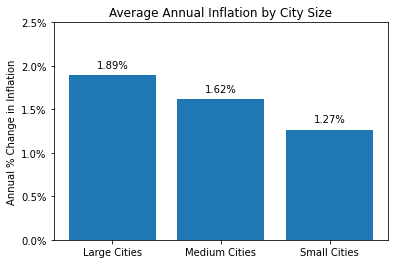

In [116]:
# create a figure and axes
fig, ax = plt.subplots()

# setting title to graph 
ax.set_title('Average Annual Inflation by City Size') 
  
# label x-axis and y-axis 
ax.set_ylabel('Annual % Change in Inflation') 

# Set format of y-axis
ax.yaxis.set_major_formatter(FuncFormatter('{:.1%}'.format))
ax.set_ylim([0,.025])

# function to plot and show graph 
ax.bar(avg_inflation.index,avg_inflation)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
### https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2%}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show() 

In [23]:
# read the clean df csv which is the master df
file_name='combined_df.csv'
csv_file=Path(f"../Data/Clean/{file_name}")
combined_df= pd.read_csv(csv_file)


# Pulling a subset of data from combined df
# Min Population - leave equal to 0 if no conditions
min_population=50000
columns_needed=['MSA','Murder Rate','Violent Crime','Affordability Rent/Median Inc','Capitalization Rate Last','Population','Population 10 year CAGR']
data_frame=combined_df[columns_needed].dropna(subset=columns_needed)
data_frame=data_frame[data_frame['Population']>min_population]
data_frame.set_index('MSA',inplace=True)
data_frame.drop(columns=['Population'],inplace=True)
data_frame = data_frame.rank()
weights = [0.1, 0.1, 0.3, 0.3, 0.2]
data_frame = data_frame * weights
data_frame['House Price Appreciation Rank'] = data_frame.sum(axis='columns')
data_frame.sort_values(by='House Price Appreciation Rank',axis='index',ascending=False,inplace=True)
data_frame.head(5)

Murder Rate  Violent Crime  Affordability Rent/Median Inc  \
MSA                                                                          
Houston, TX              3.4            4.8                            9.0   
Miami, FL                3.8            2.4                           14.7   
Tampa, FL                2.7            0.7                           12.9   
Memphis, TN              4.4            4.4                           11.4   
New Orleans, LA          4.9            1.9                           12.6   

                 Capitalization Rate Last  Population 10 year CAGR  \
MSA                                                                  
Houston, TX                          12.3                     10.0   
Miami, FL                            11.4                      6.6   
Tampa, FL                            13.2                      7.8   
Memphis, TN                          15.3                      1.6   
New Orleans, LA                      12.9                      3.6   

                 House Price Appreciation Rank  
MSA                                             
Houston, TX                               39.5  
Miami, FL                                 38.9  
Tampa, FL                                 37.3  
Memphis, TN                               37.1  
New Orleans, LA                           35.9

In [15]:
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [4]:
combined_df.head()

MSA  Violent Crime  Murder  Murder Rate  \
0    Chicago, IL        24663.0   478.0    17.517531   
1   New York, NY        50088.0   352.0     4.116545   
2  Baltimore, MD         9542.0   344.0    55.372055   
3    Houston, TX        21994.0   303.0    13.317388   
4    Detroit, MI        11846.0   295.0    43.818931   

   Population 2019 (DO NOT USE)  Population 2010 (DO NOT USE)  \
0                     9458539.0                     9470634.0   
1                    19216182.0                    18923407.0   
2                     2800053.0                     2715738.0   
3                     7066141.0                     5947236.0   
4                     4319629.0                     4291508.0   

   Population 10 year CAGR  Median income (dollars)  Mean income (dollars)  \
0                -0.000142                  75379.0               104357.0   
1                 0.001707                  83160.0               122967.0   
2                 0.003403                  83160.0               110712.0   
3                 0.019339                  69193.0                99137.0   
4                 0.000726                  63474.0                86808.0   

        City  ... 2019 Annualized Rent  Avg Monthly Rent 2019  \
0    Chicago  ...              21155.0            1762.916667   
1   New York  ...              32189.0            2682.416667   
2  Baltimore  ...              19856.0            1654.666667   
3    Houston  ...              17720.0            1476.666667   
4    Detroit  ...              14619.0            1218.250000   

   Avg Monthly Rent Last 12M  Last 12M Annualized Rent  Monthly Rent Last  \
0                1775.083333                   21301.0             1770.0   
1                2670.916667                   32051.0             2625.0   
2                1666.666667                   20000.0             1670.0   
3                1484.583333                   17815.0             1483.0   
4                1242.750000                   14913.0             1258.0   

   Rent CAGR since 2014-01  Rent Standard Deviation  \
0                 0.022398                 0.006431   
1                 0.020290                 0.005360   
2                 0.014117                 0.005929   
3                 0.023289                 0.003284   
4                 0.031806                 0.008238   

   Affordability Rent/Median Inc  Affordability Rent/Avg Inc  \
0                       0.280648                    0.202718   
1                       0.387073                    0.261769   
2                       0.238769                    0.179348   
3                       0.256095                    0.178743   
4                       0.230315                    0.168406   

   Capitalization Rate Last  
0                  0.083783  
1                  0.063369  
2                  0.065134  
3                  0.077856  
4                  0.078108  

[5 rows x 35 columns]